In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_context('poster')
sns.set_palette(sns.palettes.hls_palette(21))

In [3]:
from kid_readout.measurement.io.easync import EasyNetCDF4
#from kid_readout.analysis.resources import skip5x4

In [5]:
nc = EasyNetCDF4('/artemis/readout/hwp_mapping/2016-09-27_164807.nc')

In [6]:
ncmap = nc.map_20160927164807
z = ncmap.z[:]
z = z[:,:,:,0]
z[~np.isfinite(z)]=1e-7
x = ncmap.x[:]
y = ncmap.y[:]
xmm = -x/80.
ymm = y/80.
home = ncmap.hwp_home_indicator[:]
step_reading = ncmap.hwp_step_reading[:]
hwp_step= ncmap.hwp_step[:]

In [7]:
ffz = np.fft.rfft(z,axis=2)

In [8]:
print np.all(home[:,:,10,:]==0)
print np.all(home[:,:,11,:]==1)

False
True


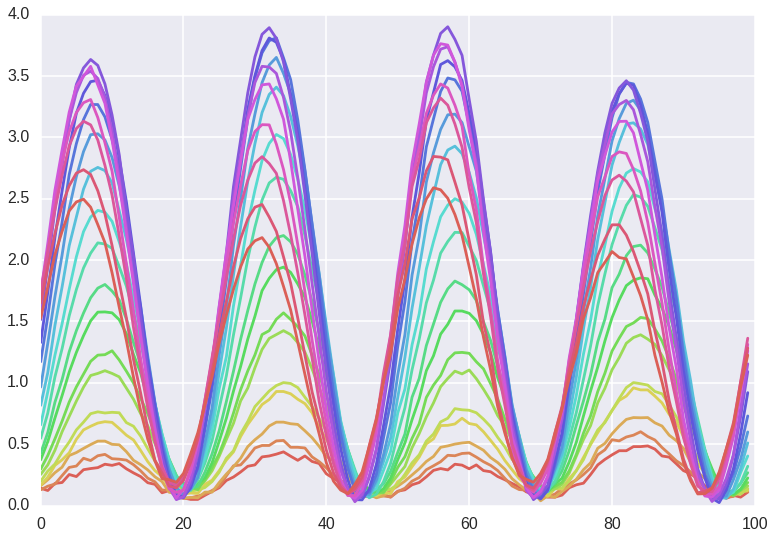

In [9]:
_=plot(1e6*z[:,0,:].T)

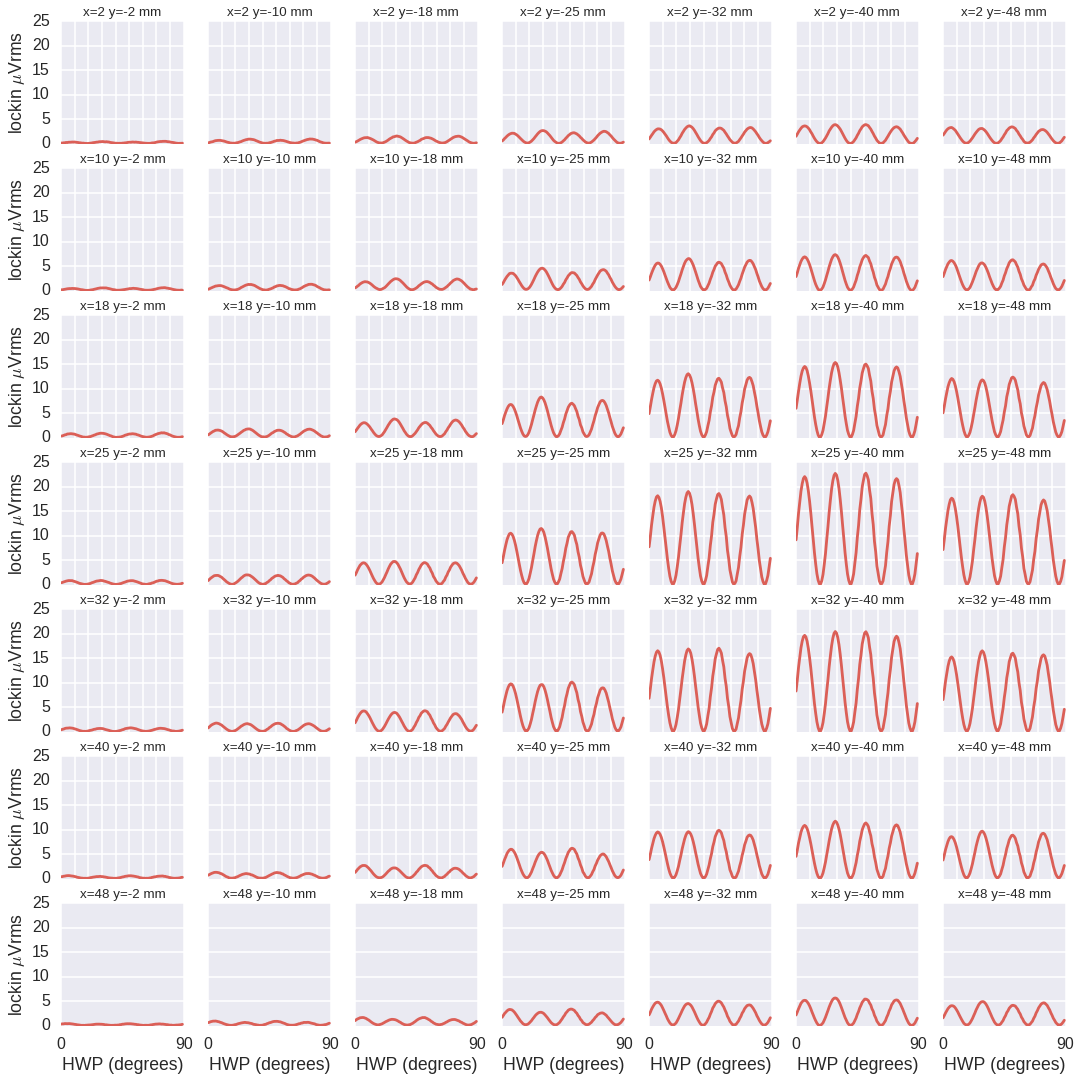

In [21]:
fig,axs = subplots(7,7,figsize=(18,18))
for xx in range(7):
    for yy in range(7):
        ax = axs[yy,xx]
        xidx = xx*3
        yidx = yy*3
        if np.any(z[xidx,yidx,:]):
            ax.plot(hwp_step*360/400.,1e6*z[xidx,yidx,:])
        ax.set_ylim(.001,25)
        ax.set_title("x=%.0f y=%.0f mm" % (ymm[yidx],xmm[xidx]),size='x-small')
        if xx != 0:
            ax.yaxis.set_ticklabels([])
        else:
            ax.set_ylabel('lockin $\mu$Vrms')
        if yy != 6:
            ax.xaxis.set_ticklabels([])
        else:
            ax.xaxis.set_major_locator(plt.MultipleLocator(90.))
            ax.set_xlabel('HWP (degrees)')

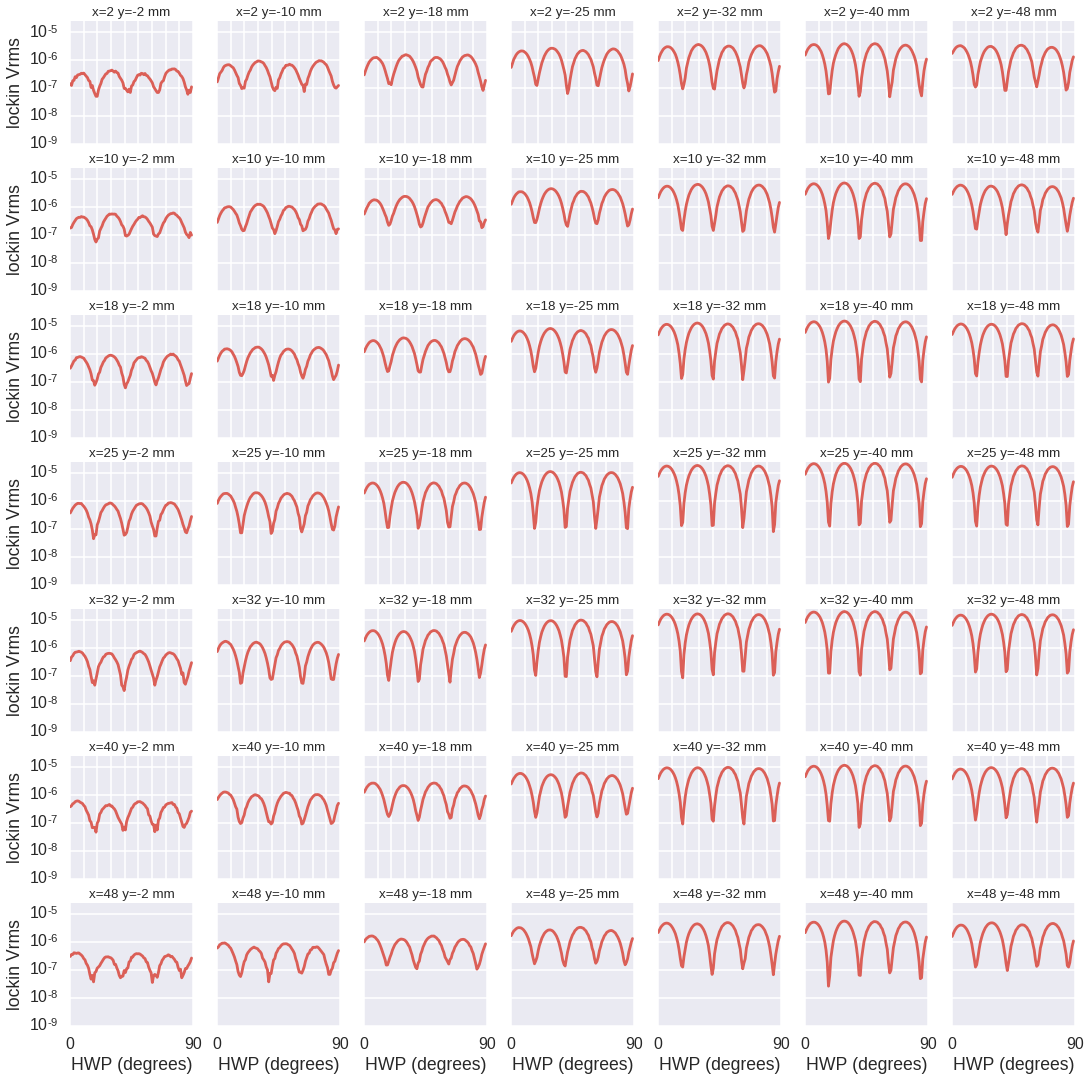

In [22]:
fig,axs = subplots(7,7,figsize=(18,18))
for xx in range(7):
    for yy in range(7):
        ax = axs[yy,xx]
        xidx = xx*3
        yidx = yy*3
        if np.any(z[xidx,yidx,:]):
            ax.semilogy(hwp_step*360/400.,z[xidx,yidx,:])
        ax.set_ylim(.001e-6,25e-6)
        ax.set_title("x=%.0f y=%.0f mm" % (ymm[yidx],xmm[xidx]),size='x-small')
        if xx != 0:
            ax.yaxis.set_ticklabels([])
        else:
            ax.set_ylabel('lockin Vrms')
        if yy != 6:
            ax.xaxis.set_ticklabels([])
        else:
            ax.xaxis.set_major_locator(plt.MultipleLocator(90.))
            ax.set_xlabel('HWP (degrees)')

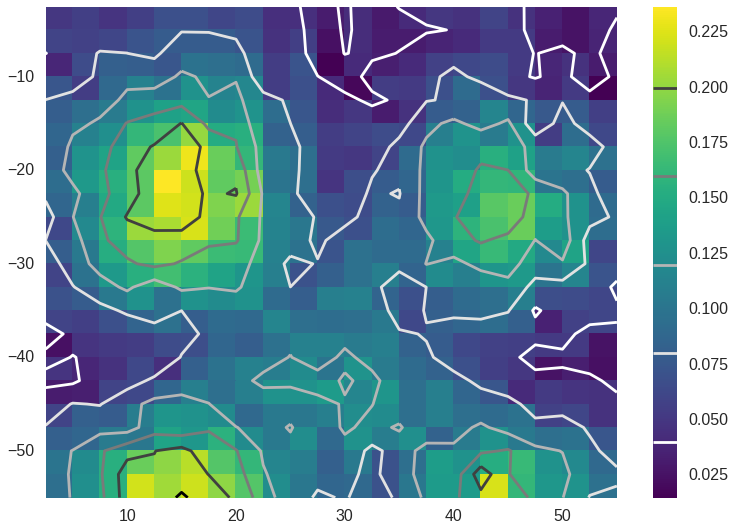

In [12]:
mins = z.min(2)
maxs = z.max(2)
fig,ax = subplots(1,1)
pc = ax.pcolormesh(ymm,xmm,mins*1e6,cmap=cm.viridis)
cb = fig.colorbar(pc,ax=ax)
cs = ax.contour(ymm,xmm,mins*1e6,color='k')
cb.add_lines(cs)

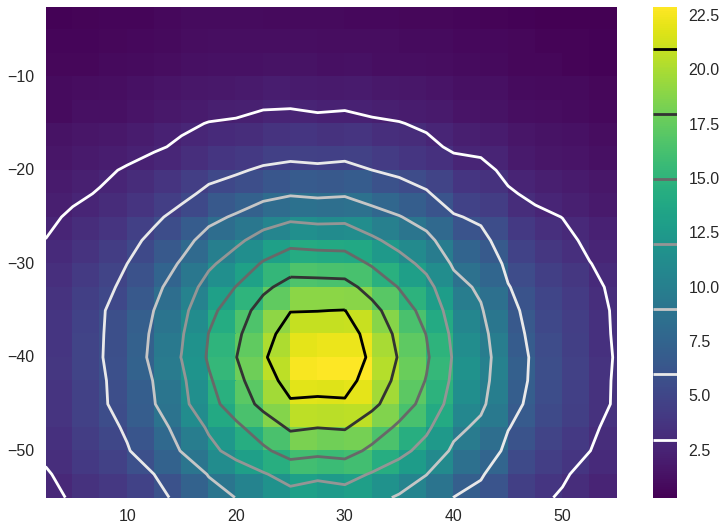

In [13]:
mins = z.min(2)
maxs = z.max(2)
fig,ax = subplots(1,1)
pc = ax.pcolormesh(ymm,xmm,maxs*1e6,cmap=cm.viridis)
cb = fig.colorbar(pc,ax=ax)
cs = ax.contour(ymm,xmm,maxs*1e6,color='k')
cb.add_lines(cs)

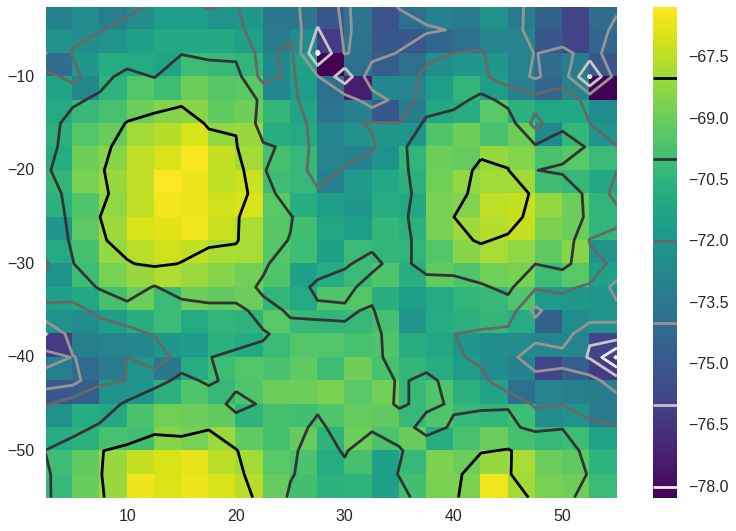

In [14]:
mins = z.min(2)
maxs = z.max(2)
fig,ax = subplots(1,1)
pc = ax.pcolormesh(ymm,xmm,10*np.log10(mins),cmap=cm.viridis)
cb = fig.colorbar(pc,ax=ax)
cs = ax.contour(ymm,xmm,10*np.log10(mins),color='k')
cb.add_lines(cs)

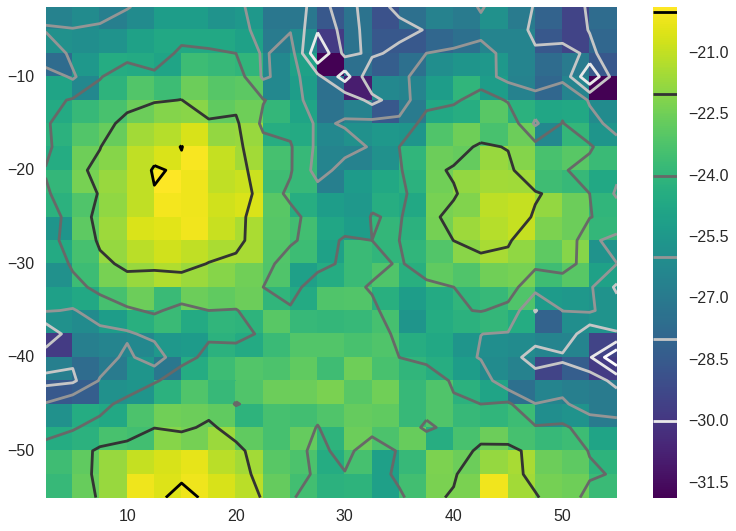

In [15]:
mins = z.min(2)
maxs = z.max(2)
fig,ax = subplots(1,1)
pc = ax.pcolormesh(ymm,xmm,10*np.log10(mins/maxs.max()),cmap=cm.viridis)
cb = fig.colorbar(pc,ax=ax)
cs = ax.contour(ymm,xmm,10*np.log10(mins/maxs.max()),color='k')
cb.add_lines(cs)

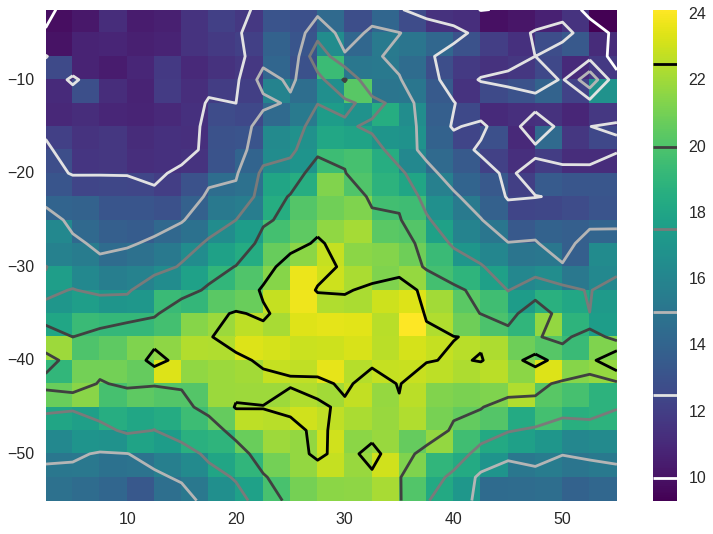

In [16]:
mins = z.min(2)
maxs = z.max(2)
fig,ax = subplots(1,1)
pc = ax.pcolormesh(ymm,xmm,10*np.log10(maxs/mins),cmap=cm.viridis)
cb = fig.colorbar(pc,ax=ax)
cs = ax.contour(ymm,xmm,10*np.log10(maxs/mins),color='k')
cb.add_lines(cs)


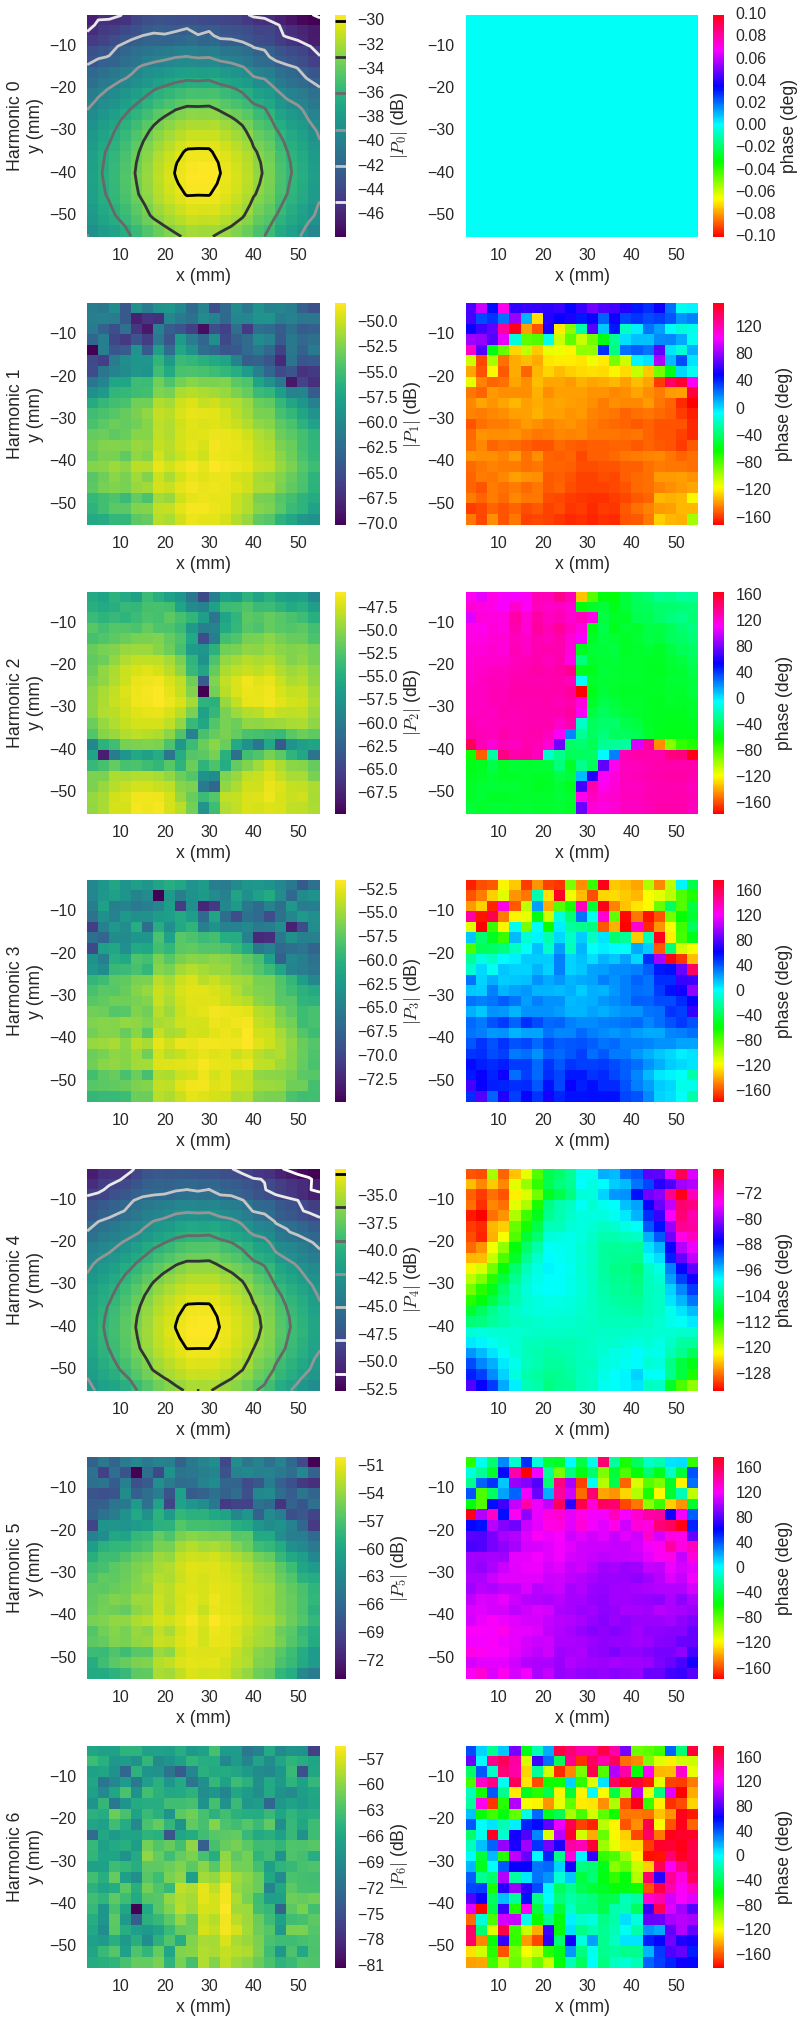

In [17]:
nharm = 7
fig,axs = subplots(nharm,2,figsize=(12,5*nharm))
fig.subplots_adjust(wspace=.3, hspace=0.3)
for harm in range(nharm):
    pc = axs[harm,1].pcolormesh(ymm,xmm,np.degrees(np.angle(ffz[:,:,harm])),cmap=cm.hsv)
    cb = fig.colorbar(pc,ax=axs[harm,1])
    cb.set_label('phase (deg)')
    pc = axs[harm,0].pcolormesh(ymm,xmm,10*np.log10(np.abs(ffz[:,:,harm])),cmap=cm.viridis)
    cb = fig.colorbar(pc,ax=axs[harm,0])
    cb.set_label('$|P_%d|$ (dB)' % harm)
    if harm in [0,4]:
        cs = axs[harm,0].contour(ymm,xmm,10*np.log10(np.abs(ffz[:,:,harm])),color='k')
        cb.add_lines(cs)
        xlim_ = axs[harm,0].get_xlim()
        ylim_ = axs[harm,0].get_ylim()
    for c in [0,1]:
        axs[harm,c].set_xlim(xlim_)
        axs[harm,c].set_ylim(ylim_)
    axs[harm,0].set_ylabel('Harmonic %d\ny (mm)' % (harm))
    axs[harm,0].set_xlabel('x (mm)')
    axs[harm,1].set_xlabel('x (mm)')

    

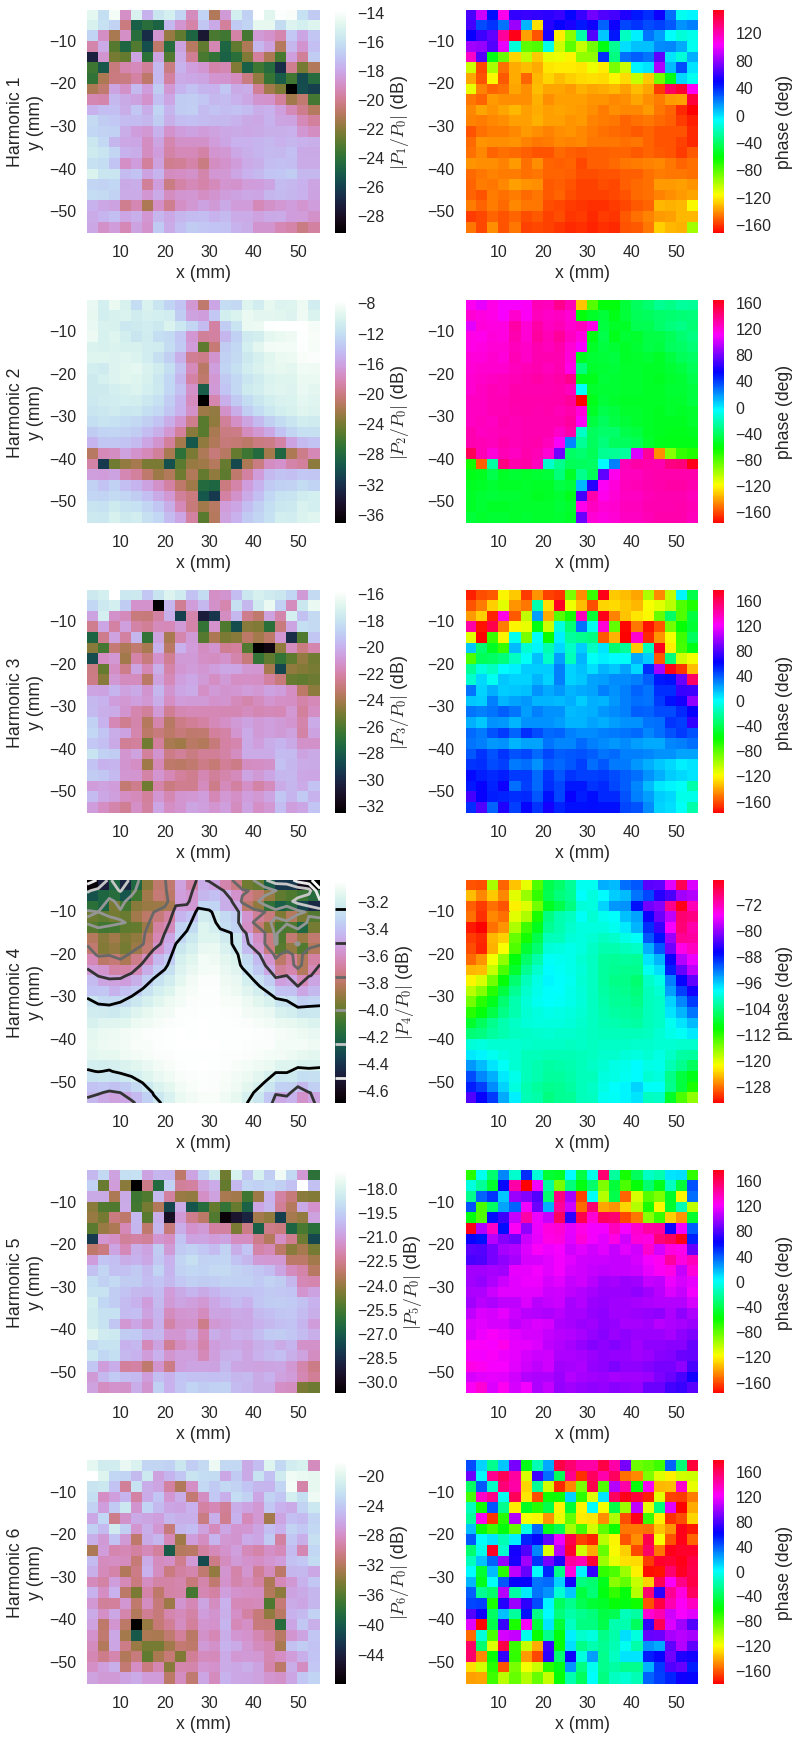

In [18]:
nharm = 7
fig,axs = subplots(nharm-1,2,figsize=(12,5*(nharm-1)))
fig.subplots_adjust(wspace=.3, hspace=0.3)
for harm in range(1,nharm):
    pc = axs[harm-1,1].pcolormesh(ymm,xmm,np.degrees(np.angle(ffz[:,:,harm]/ffz[:,:,0])),cmap=cm.hsv)
    cb = fig.colorbar(pc,ax=axs[harm-1,1])
    cb.set_label('phase (deg)')
    pc = axs[harm-1,0].pcolormesh(ymm,xmm,10*np.log10(np.abs(ffz[:,:,harm]/ffz[:,:,0])),cmap=cm.cubehelix)
    cb = fig.colorbar(pc,ax=axs[harm-1,0])
    cb.set_label('$|P_%d / P_0|$ (dB)' % harm)
    if harm in [0,4]:
        cs = axs[harm-1,0].contour(ymm,xmm,10*np.log10(np.abs(ffz[:,:,harm]/ffz[:,:,0])),color='k')
        cb.add_lines(cs)
        xlim_ = axs[harm-1,0].get_xlim()
        ylim_ = axs[harm-1,0].get_ylim()
    for c in [0,1]:
        axs[harm-1,c].set_xlim(xlim_)
        axs[harm-1,c].set_ylim(ylim_)
    axs[harm-1,0].set_ylabel('Harmonic %d\ny (mm)' % (harm))
    axs[harm-1,0].set_xlabel('x (mm)')
    axs[harm-1,1].set_xlabel('x (mm)')

    

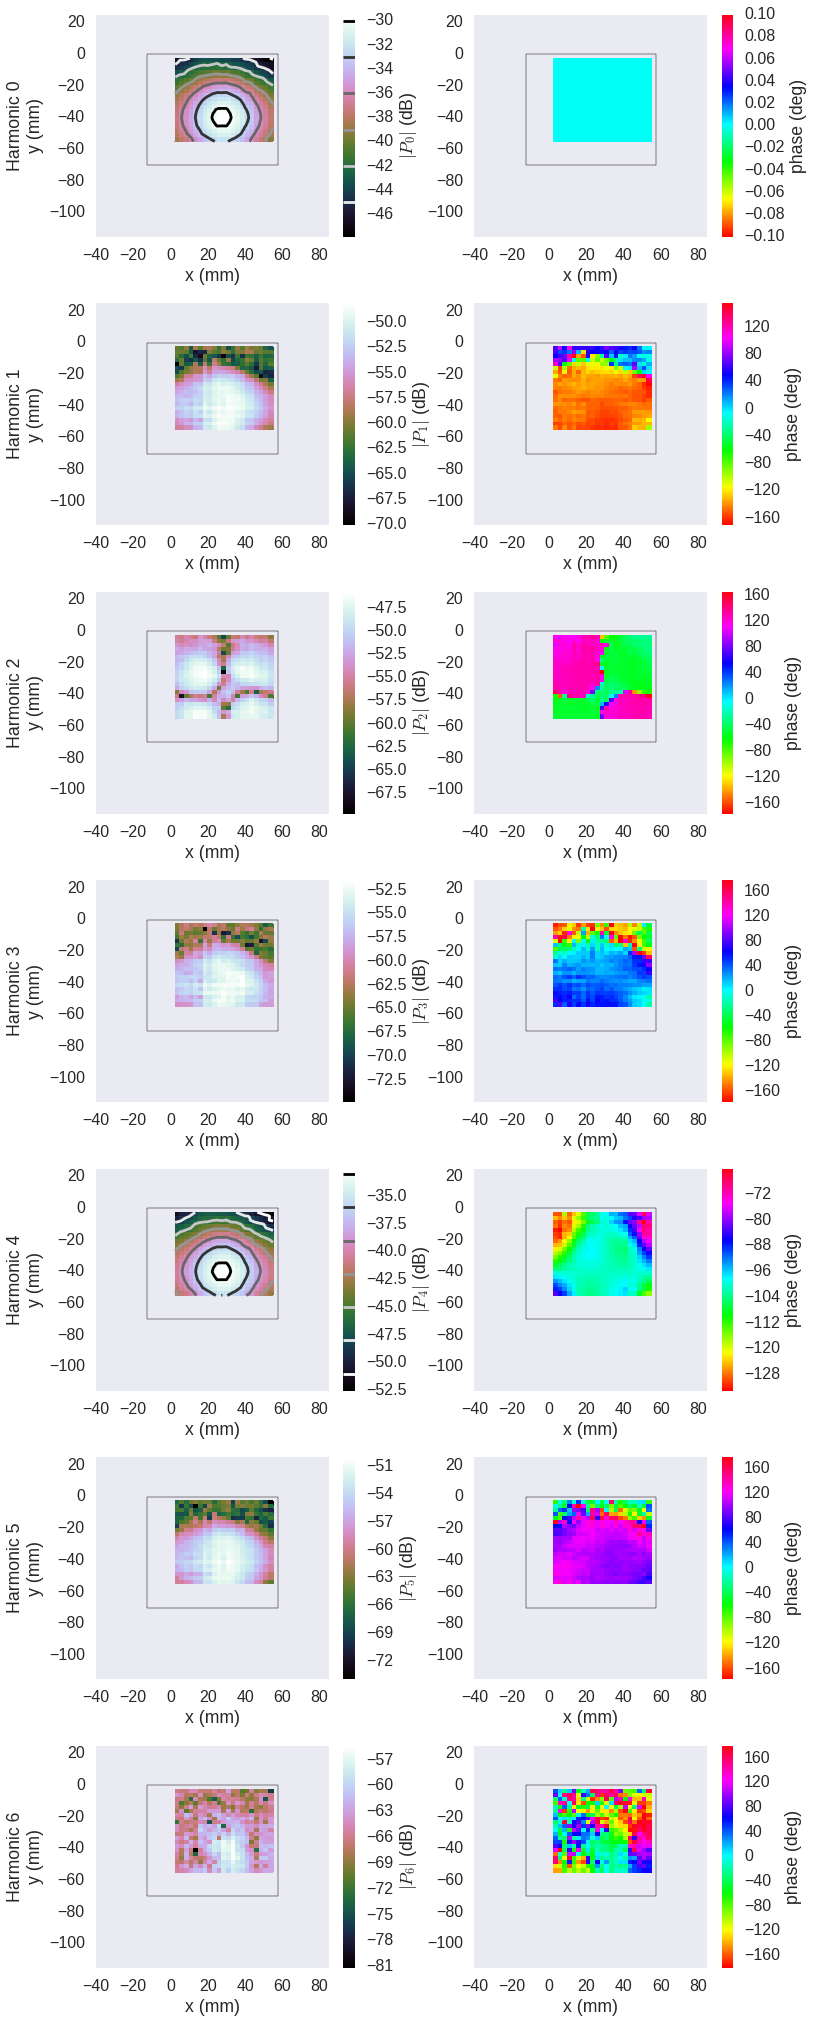

In [19]:
nharm = 7
fig,axs = subplots(nharm,2,figsize=(12,5*nharm))
#axs = axs.reshape((1,-1))
fig.subplots_adjust(wspace=.3, hspace=0.3)
for harm in range(nharm):
    pc = axs[harm,1].pcolormesh(ymm,xmm,np.degrees(np.angle(ffz[:,:,harm])),cmap=cm.hsv)
    cb = fig.colorbar(pc,ax=axs[harm,1])
    cb.set_label('phase (deg)')
    pc = axs[harm,0].pcolormesh(ymm,xmm,10*np.log10(np.abs(ffz[:,:,harm])),cmap=cm.cubehelix)
    cb = fig.colorbar(pc,ax=axs[harm,0])
    cb.set_label('$|P_%d|$ (dB)' % harm)
    if harm in [0,4]:
        cs = axs[harm,0].contour(ymm,xmm,10*np.log10(np.abs(ffz[:,:,harm])),color='k')
        cb.add_lines(cs)
        xlim_ = axs[harm,0].get_xlim()
        ylim_ = axs[harm,0].get_ylim()
    for c in [0,1]:
        axs[harm,c].set_xlim(-40,85)
        axs[harm,c].set_ylim(-115,140-115)
        r = plt.Rectangle((125/2.-35-40,-70),70,70,facecolor='none',edgecolor='k',alpha=1)
        axs[harm,c].add_artist(r)
    axs[harm,0].set_ylabel('Harmonic %d\ny (mm)' % (harm))
    axs[harm,0].set_xlabel('x (mm)')
    axs[harm,1].set_xlabel('x (mm)')

    

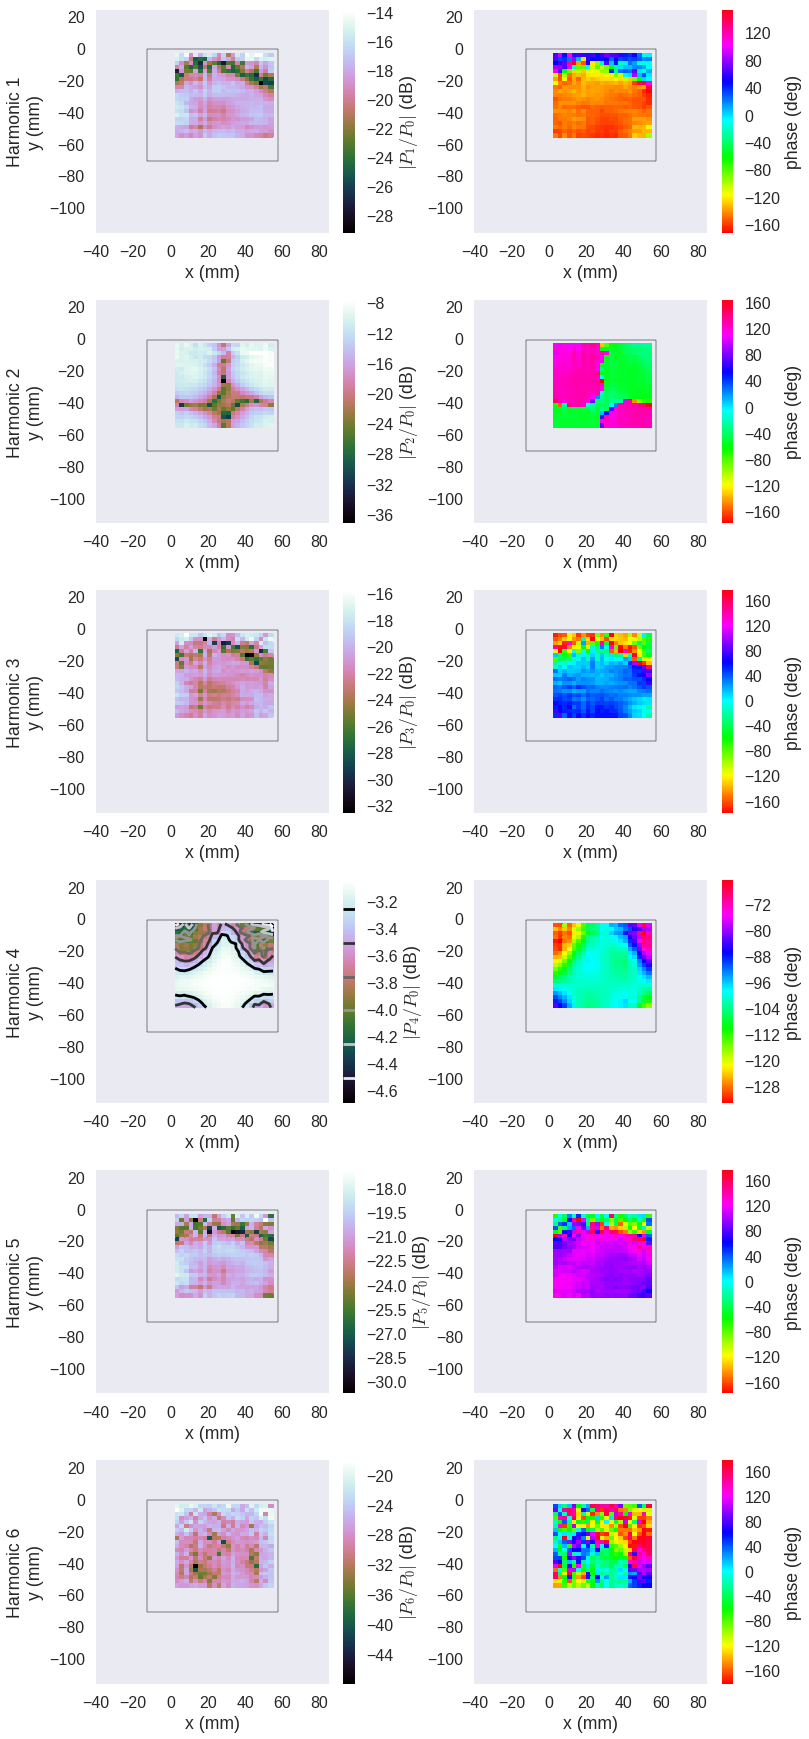

In [20]:
nharm = 7
fig,axs = subplots(nharm-1,2,figsize=(12,5*(nharm-1)))
fig.subplots_adjust(wspace=.3, hspace=0.3)
for harm in range(1,nharm):
    pc = axs[harm-1,1].pcolormesh(ymm,xmm,np.degrees(np.angle(ffz[:,:,harm]/ffz[:,:,0])),cmap=cm.hsv)
    cb = fig.colorbar(pc,ax=axs[harm-1,1])
    cb.set_label('phase (deg)')
    pc = axs[harm-1,0].pcolormesh(ymm,xmm,10*np.log10(np.abs(ffz[:,:,harm]/ffz[:,:,0])),cmap=cm.cubehelix)
    cb = fig.colorbar(pc,ax=axs[harm-1,0])
    cb.set_label('$|P_%d / P_0|$ (dB)' % harm)
    if harm in [0,4]:
        cs = axs[harm-1,0].contour(ymm,xmm,10*np.log10(np.abs(ffz[:,:,harm]/ffz[:,:,0])),color='k')
        cb.add_lines(cs)
        xlim_ = axs[harm-1,0].get_xlim()
        ylim_ = axs[harm-1,0].get_ylim()
    for c in [0,1]:
        axs[harm-1,c].set_xlim(-40,85)
        axs[harm-1,c].set_ylim(-115,140-115)
        r = plt.Rectangle((125/2.-35-40,-70),70,70,facecolor='none',edgecolor='k',alpha=1)
        axs[harm-1,c].add_artist(r)
    axs[harm-1,0].set_ylabel('Harmonic %d\ny (mm)' % (harm))
    axs[harm-1,0].set_xlabel('x (mm)')
    axs[harm-1,1].set_xlabel('x (mm)')

    

In [21]:
imshow((np.angle(ffz[:,:,4,0])*180/np.pi),aspect='auto',cmap=cm.cubehelix)
#clim(0,180)
colorbar()

IndexError: too many indices for array

In [ ]:
imshow((np.angle(ffz[:,:,2,0]/ffz[:,:,0,0]))*180/np.pi,aspect='auto',cmap=cm.hsv)
clim(0,180)
colorbar()

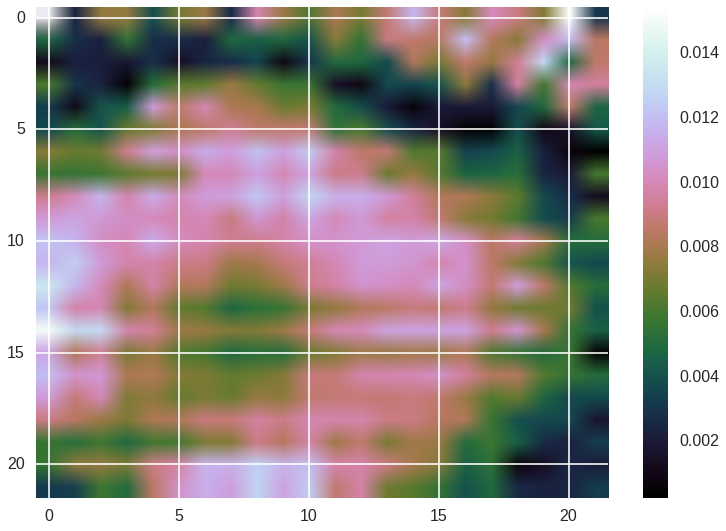

In [24]:
imshow((np.abs(ffz[:,:,5,0]/ffz[:,:,0,0])),aspect='auto',cmap=cm.cubehelix)
colorbar()

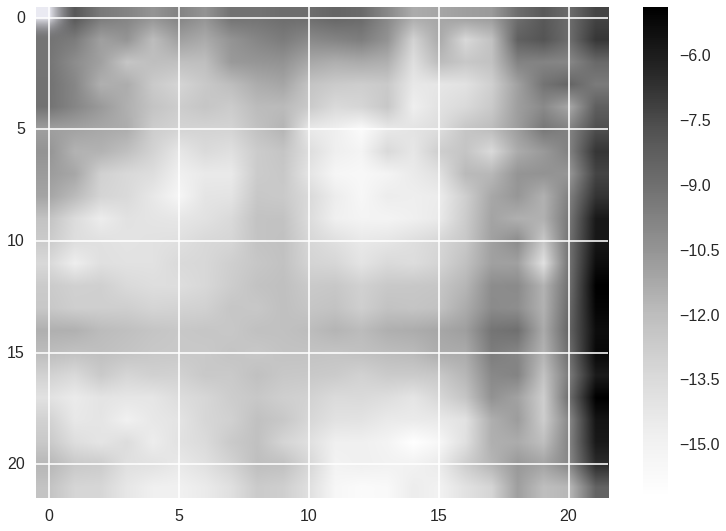

In [26]:
imshow(10*np.log10(np.min(z[:,:,:,0],axis=2)/np.max(z[:,:,:,0],axis=2)),aspect='auto')
colorbar()

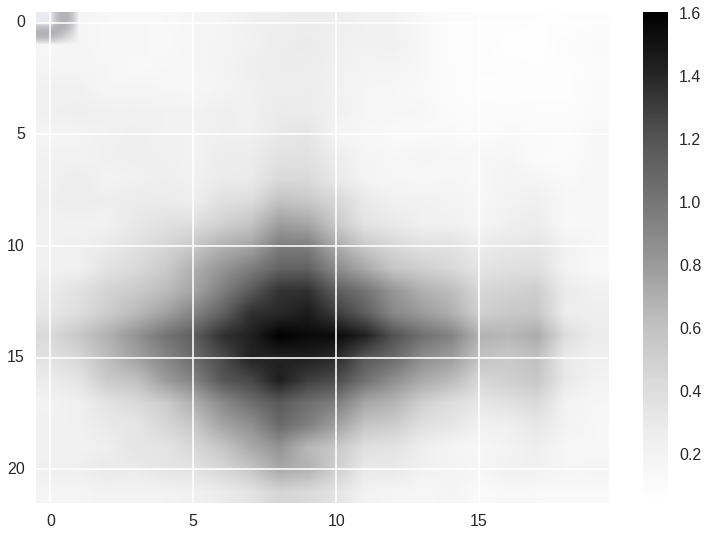

In [29]:
imshow(np.min(1e6*z[:,:20,:,0],axis=2),aspect='auto')
colorbar()

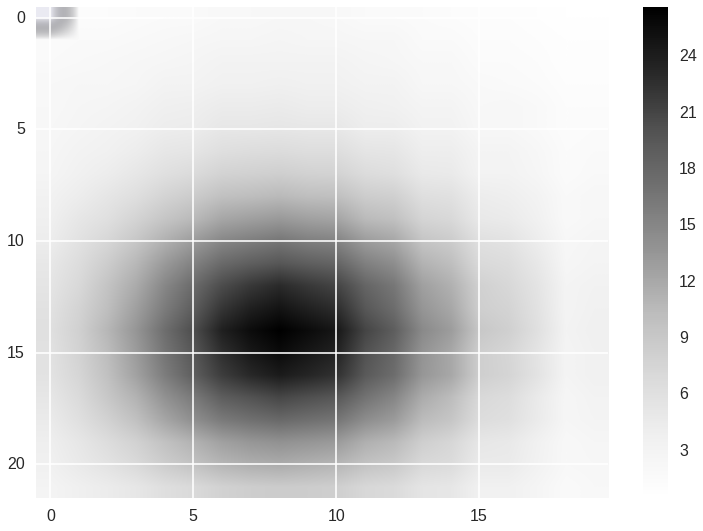

In [30]:
imshow(np.max(1e6*z[:,:20,:,0],axis=2),aspect='auto')
colorbar()

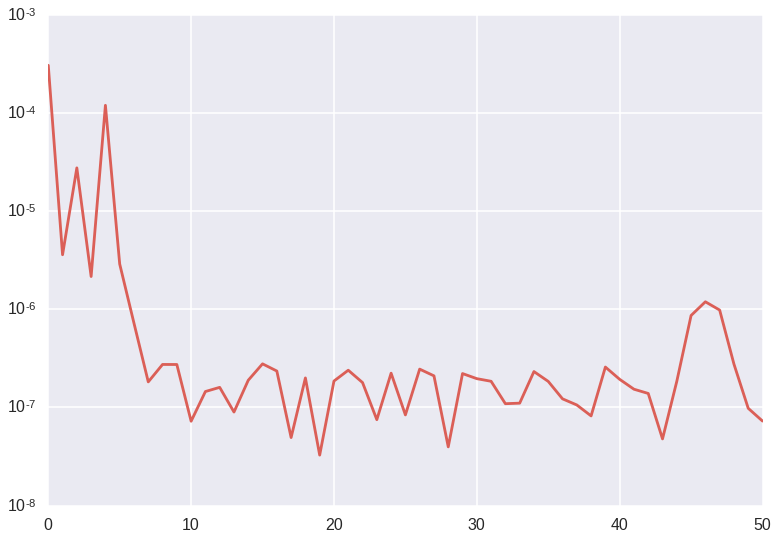

In [34]:
semilogy(np.abs(ffz[8,14,:,0]))